In [1]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\test
input\training


In [2]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [3]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [4]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

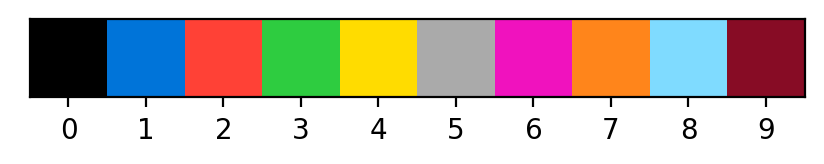

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [6]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [7]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [8]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [9]:
def findmodemap(A,B):
    A_array=np.array(A)
    
    B_pad=np.pad(B,((2,2),(2,2)),"constant",constant_values=(-1,-1))
    A_pad=np.pad(A,((2,2),(2,2)),"constant",constant_values=(-1,-1))
    m,n=A_pad.shape
    #total_dict={}
    dict1={}
    sam1x1=[]
    A1=A_pad.copy()
    A2=A_pad.copy()
    count=0
    for k in range(200):
        #dict1={}
    
        for i in range(m):
            for j in range(n):
                
                if A1[i,j]!=-1 and A1[i,j]!=0:
                    
                    if str(A1[i-1:i+2,j-1:j+2]) not in dict1 and str(A1[i-1:i+2,j-1:j+2]) not in sam1x1:
                        dict1[str(A1[i-1:i+2,j-1:j+2])]=B_pad[i-1:i+2,j-1:j+2]
                        dict1[str(A1[i-2:i+3,j-2:j+3])]=B_pad[i-2:i+3,j-2:j+3]
                        
                    elif str(A1[i-1:i+2,j-1:j+2]) in sam1x1:
                        dict1[str(A1[i-2:i+3,j-2:j+3])]=B_pad[i-2:i+3,j-2:j+3]
                        
                    elif (str(A1[i-1:i+2,j-1:j+2]) in dict1 and (dict1[str(A1[i-1:i+2,j-1:j+2])]!= B_pad[i-1:i+2,j-1:j+2]).any()):
                        if str(A1[i-2:i+3,j-2:j+3]) not in dict1:
                            
                            dict1[str(A1[i-2:i+3,j-2:j+3])]=B_pad[i-2:i+3,j-2:j+3]
                            sam1x1.append(str(A1[i-1:i+2,j-1:j+2]))
                        else:
                            if (dict1[str(A1[i-2:i+3,j-2:j+3])]!=B_pad[i-2:i+3,j-2:j+3]).any():
                                
                                continue


                        
                                

                        
        A1_copy=A1.copy()
        #print(dict1)
        for i in range(2,m-2):
            for j in range(2,n-2):
                if A1_copy[i,j]!=-1 and A1_copy[i,j]!=0:
                    
                    #print(A1_copy[i-1:i+2,j-1:j+2])
                    if str(A1_copy[i-1:i+2,j-1:j+2]) not in dict1.keys() and str(A1_copy[i-1:i+2,j-1:j+2]) not in sam1x1:
                        #print("222")
                        continue
                    elif str(A1_copy[i-1:i+2,j-1:j+2]) in sam1x1:
                        #print(str(A1_copy[i-2:i+3,j-2:j+3]))
                        
                        if str(A1_copy[i-2:i+3,j-2:j+3]) in dict1.keys():
                            A2[i-1:i+2,j-1:j+2]=dict1[str(A1_copy[i-2:i+3,j-2:j+3])][1:-1,1:-1]
                        else:
                            continue
                    elif str(A1_copy[i-1:i+2,j-1:j+2]) in dict1.keys():  
                        A2[i-1:i+2,j-1:j+2]=dict1[str(A1_copy[i-1:i+2,j-1:j+2])]
                    
                        
 
                        
                    
                        
                        
        if A2[2:-2,2:-2].tolist()==B:
            count+=1
#             plot_picture(A2.tolist())
        else:
            count=0
        if count>=3:
            break

        A1=A2
#         plot_picture(A1.tolist())
#         print(k)
            
    if A1[2:-2,2:-2].tolist()!=B:
        return -1
    return dict1,sam1x1

In [10]:
def usemodedict(A,dict1,sam1x1):

    A_array=np.array(A)
    A_pad=np.pad(A,((2,2),(2,2)),"constant",constant_values=(-1,-1))
    m,n=A_pad.shape
    A1=A_pad.copy()
    A2=A_pad.copy()
    count=0
    #print(dict1,sam1x1)
    for k in range(200):
        A1_copy=A1.copy()
        for i in range(2,m-2):
            for j in range(2,n-2):
                if A1_copy[i,j]!=-1 and A1_copy[i,j]!=0:
                    if str(A1_copy[i-1:i+2,j-1:j+2]) not in dict1.keys() and str(A1_copy[i-1:i+2,j-1:j+2]) not in sam1x1:
                        #print("222")
                        continue
                    elif str(A1_copy[i-1:i+2,j-1:j+2]) in sam1x1:
                        #print(str(A1_copy[i-2:i+3,j-2:j+3]))
                        
                        if str(A1_copy[i-2:i+3,j-2:j+3]) in dict1.keys():
                            A2[i-1:i+2,j-1:j+2]=dict1[str(A1_copy[i-2:i+3,j-2:j+3])][1:-1,1:-1]
                        else:
                            continue
                    elif str(A1_copy[i-1:i+2,j-1:j+2]) in dict1.keys():  
                        
                        A2[i-1:i+2,j-1:j+2]=dict1[str(A1_copy[i-1:i+2,j-1:j+2])]
                        
        A1=A2
#         plot_picture(A1.tolist())
        if (A2==A1_copy).all():
            count+=1
#             plot_picture(A2.tolist())
        else:
            count=0
        if count>=3:
            break
    return A1[2:-2,2:-2].tolist()

In [11]:
# def findmodemap(A,B):
#     A_array=np.array(A)
    
#     B_pad=np.pad(B,((2,2),(2,2)),"constant",constant_values=(-1,-1))
#     A_pad=np.pad(A,((2,2),(2,2)),"constant",constant_values=(-1,-1))
#     m,n=A_pad.shape
#     #total_dict={}
#     dict1={}
#     sam1x1=[]
#     A1=A_pad.copy()
#     A2=A_pad.copy()
#     count=0
#     for k in range(200):
#         #dict1={}
    
#         for i in range(m):
#             for j in range(n):
                
#                 if A1[i,j]!=-1 and A1[i,j]!=0:
                    
#                     if str(A1[i-1:i+2,j-1:j+2]) not in dict1 and str(A1[i-1:i+2,j-1:j+2]) not in sam1x1:
#                         dict1[str(A1[i-1:i+2,j-1:j+2])]=B_pad[i-1:i+2,j-1:j+2]
#                         dict1[str(A1[i-2:i+3,j-2:j+3])]=B_pad[i-2:i+3,j-2:j+3]
                        
#                     elif str(A1[i-1:i+2,j-1:j+2]) in sam1x1:
#                         dict1[str(A1[i-2:i+3,j-2:j+3])]=B_pad[i-2:i+3,j-2:j+3]
                        
#                     elif (str(A1[i-1:i+2,j-1:j+2]) in dict1 and (dict1[str(A1[i-1:i+2,j-1:j+2])]!= B_pad[i-1:i+2,j-1:j+2]).any()):
#                         if str(A1[i-2:i+3,j-2:j+3]) not in dict1:
                            
#                             dict1[str(A1[i-2:i+3,j-2:j+3])]=B_pad[i-2:i+3,j-2:j+3]
#                             sam1x1.append(str(A1[i-1:i+2,j-1:j+2]))
#                         else:
#                             if (dict1[str(A1[i-2:i+3,j-2:j+3])]!=B_pad[i-2:i+3,j-2:j+3]).any():
                                
#                                 continue
#                     else:
#                         dict1[str(A1[i-2:i+3,j-2:j+3])]=B_pad[i-2:i+3,j-2:j+3]


                        
                                

                        
        
#         #print(dict1)
#         for i in range(2,m-2):
#             for j in range(2,n-2):
#                 A1_copy=A1.copy()
#                 if A1_copy[i,j]!=-1 and A1_copy[i,j]!=0:
                    
#                     #print(A1_copy[i-1:i+2,j-1:j+2])
#                     if str(A1_copy[i-1:i+2,j-1:j+2]) not in dict1.keys() and str(A1_copy[i-1:i+2,j-1:j+2]) not in sam1x1:
#                         #print("222")
#                         continue
#                     elif str(A1_copy[i-1:i+2,j-1:j+2]) in sam1x1:
#                         #print(str(A1_copy[i-2:i+3,j-2:j+3]))
                        
#                         if str(A1_copy[i-2:i+3,j-2:j+3]) in dict1.keys():
#                             A2[i-1:i+2,j-1:j+2]=dict1[str(A1_copy[i-2:i+3,j-2:j+3])][1:-1,1:-1]
#                         else:
#                             continue
#                     elif str(A1_copy[i-1:i+2,j-1:j+2]) in dict1.keys():  
#                         A2[i-1:i+2,j-1:j+2]=dict1[str(A1_copy[i-1:i+2,j-1:j+2])]
                    
#                 A1=A2
 
                        
                    
                        
                        
#         if A2[2:-2,2:-2].tolist()==B:
#             count+=1
# #             plot_picture(A2.tolist())
#         else:
#             count=0
#         if count>=3:
#             break

        
#         plot_picture(A1.tolist())
#         print(k)
            
#     if A1[2:-2,2:-2].tolist()!=B:
#         return -1
#     return dict1,sam1x1

In [13]:
# def usemodedict(A,dict1,sam1x1):

#     A_array=np.array(A)
#     A_pad=np.pad(A,((2,2),(2,2)),"constant",constant_values=(-1,-1))
#     m,n=A_pad.shape
#     A1=A_pad.copy()
#     A2=A_pad.copy()
#     count=0
#     #print(dict1,sam1x1)
#     for k in range(200):
        
#         for i in range(2,m-2):
#             for j in range(2,n-2):
#                 A1_copy=A1.copy()
#                 if A1_copy[i,j]!=-1 and A1_copy[i,j]!=0:
#                     if str(A1_copy[i-1:i+2,j-1:j+2]) not in dict1.keys() and str(A1_copy[i-1:i+2,j-1:j+2]) not in sam1x1:
#                         #print("222")
#                         continue
#                     elif str(A1_copy[i-1:i+2,j-1:j+2]) in sam1x1:
#                         #print(str(A1_copy[i-2:i+3,j-2:j+3]))
                        
#                         if str(A1_copy[i-2:i+3,j-2:j+3]) in dict1.keys():
#                             A2[i-1:i+2,j-1:j+2]=dict1[str(A1_copy[i-2:i+3,j-2:j+3])][1:-1,1:-1]
#                         else:
#                             continue
#                     elif str(A1_copy[i-1:i+2,j-1:j+2]) in dict1.keys():  
                        
#                         A2[i-1:i+2,j-1:j+2]=dict1[str(A1_copy[i-1:i+2,j-1:j+2])]
#                 A1=A2
        

#     return A1[2:-2,2:-2].tolist()

In [14]:
A0=Trains[57]["train"][2]["input"]
B0=Trains[57]["train"][2]["output"]
A=Defensive_Copy(A0)
B=Defensive_Copy(B0)
A[0][0]=B[0][0]
total_dict,sam1x1=findmodemap(A,B)
C=Trains[57]["test"][0]["input"]
C[0][0]=B[0][0]
usemodedict(A,total_dict,sam1x1)

[[3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [12]:
def Solve_mode_dict(basic_task): 
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    total_dict={}
    total_sam1x1=[]
    for i in range(1,10):
        mask=False
        for j in range(len(Input)):
            if i in Test_Case and i  in Input[j] :
                mask=True
                break
            elif i not in Test_Case:
                mask=True
                break
        if mask==False:
            return -1
    for x, y in zip(Input,Output):
        if len(x)!=len(y) or len(x[0])!=len(y[0]):
            return -1
        if findmodemap(x,y)==-1:
            return -1
        else:
            dict1,sam1x1=findmodemap(x,y)
            total_dict=dict(total_dict,**dict1)
            total_sam1x1.extend(sam1x1)
    for x, y in zip(Input,Output):
        #plot_picture(usemodedict(x,total_dict,total_sam1x1))
        if y!=usemodedict(x,total_dict,total_sam1x1):
            return -1
    return usemodedict(Test_Case,total_dict,total_sam1x1)

In [13]:
# correct=0
# wrong=0
# for i in range(400):
#     task = Trains[i]
#     k = len(task['test'])

#     for j in range(k):
#         basic_task = Create(task, j)
#         a = Solve_mode_dict(basic_task)

#         if a != -1 :
#             if task['test'][j]['output'] == a:
#                 correct+=1
#             else:
#                 wrong+=1
# print(correct,wrong)

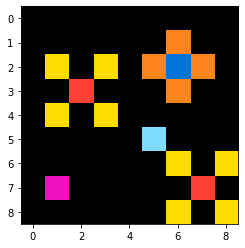

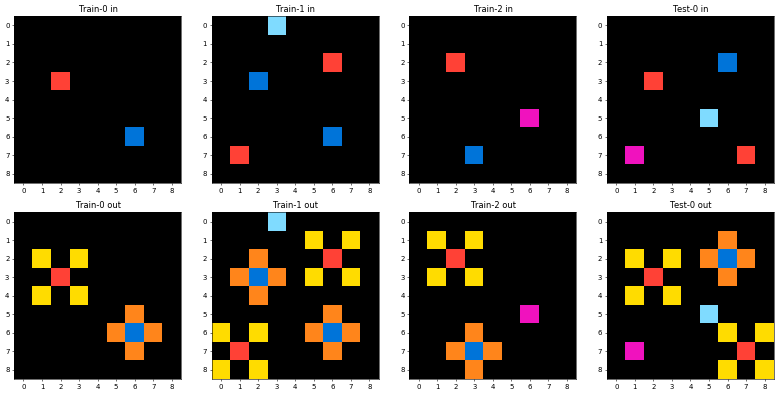

14


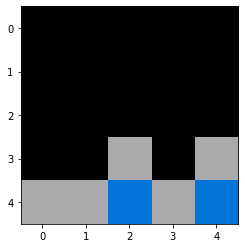

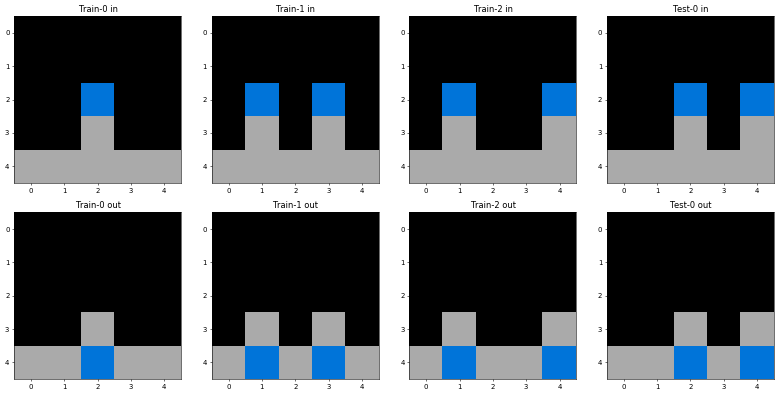

72


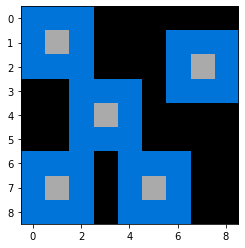

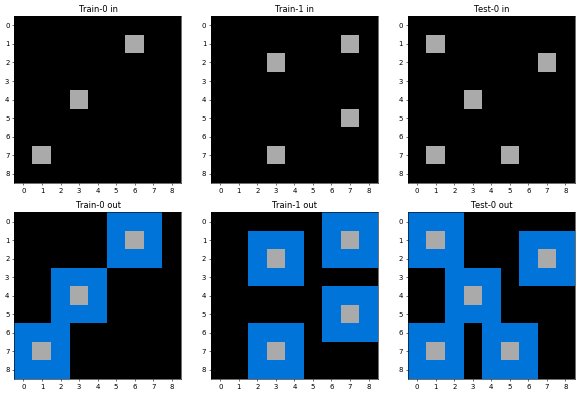

94


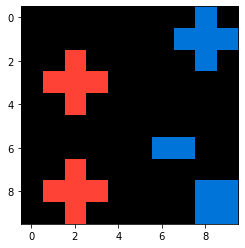

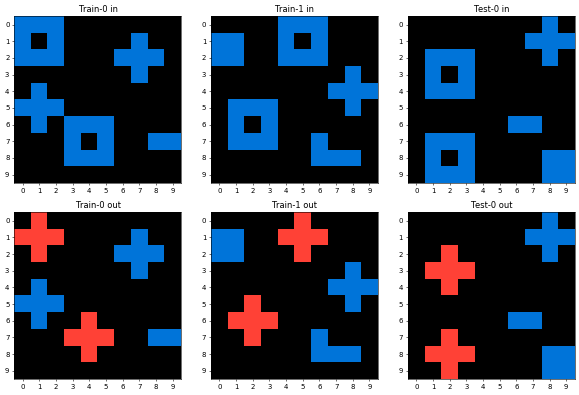

159


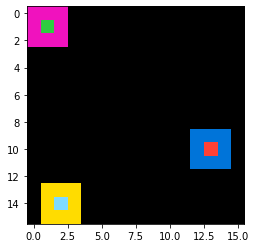

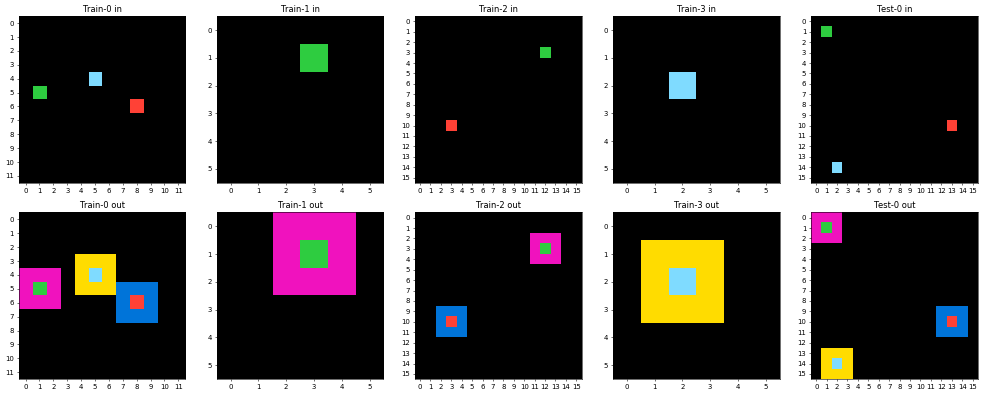

219


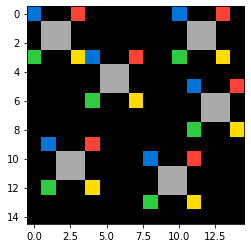

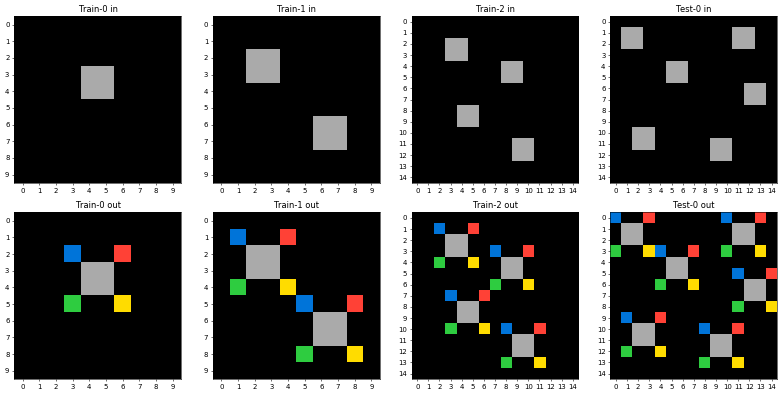

229


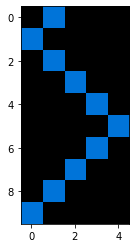

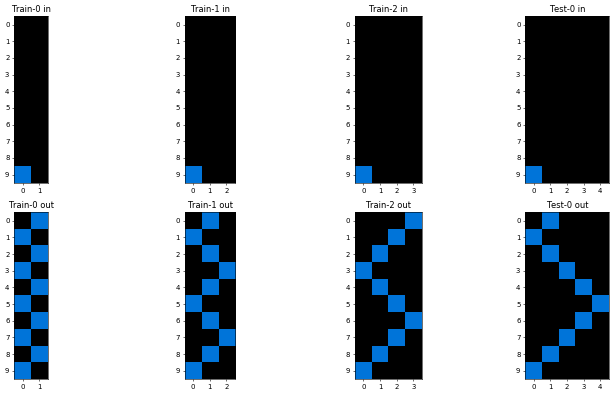

247


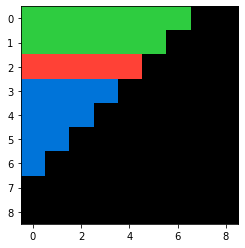

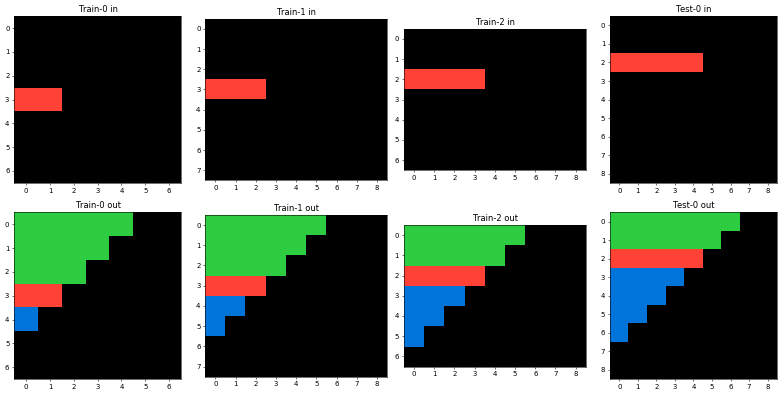

255


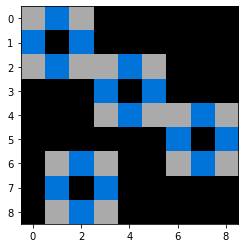

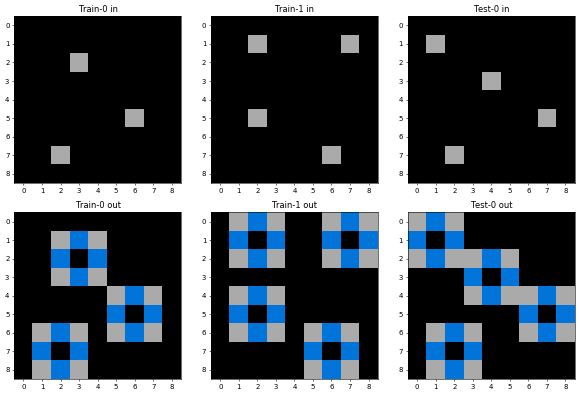

281


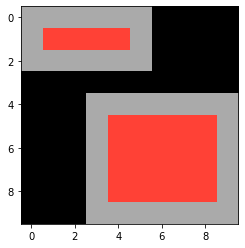

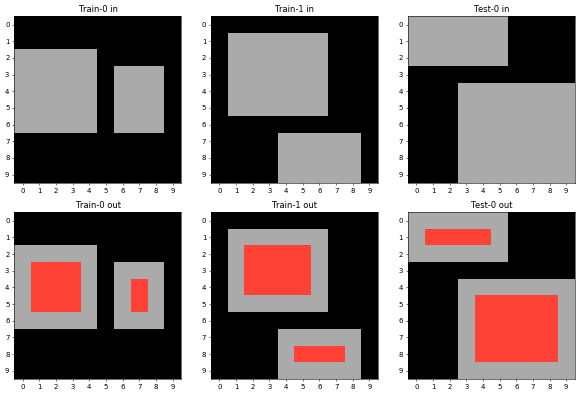

293


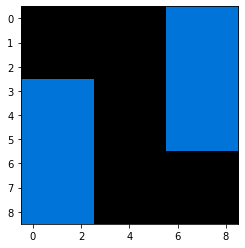

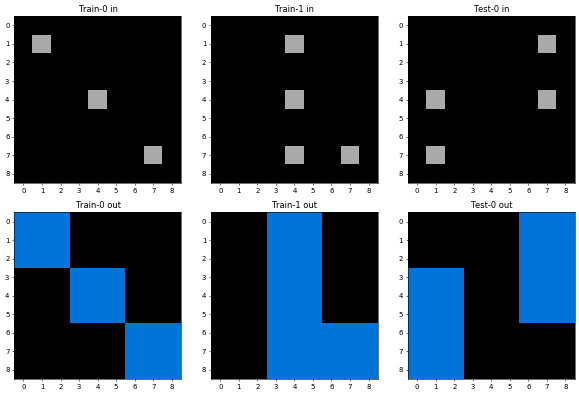

316


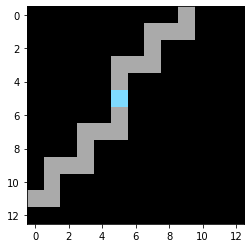

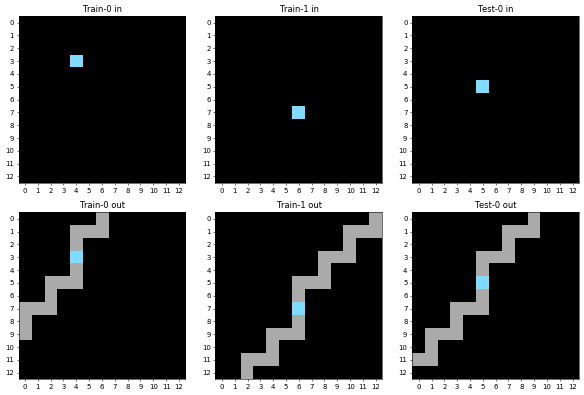

322


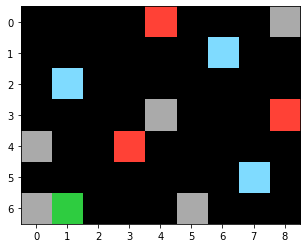

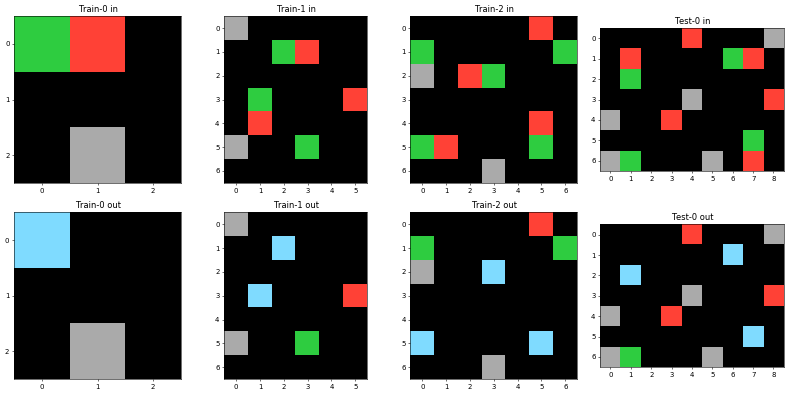

343


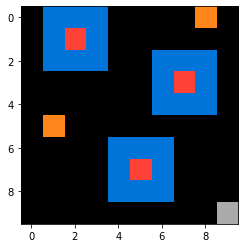

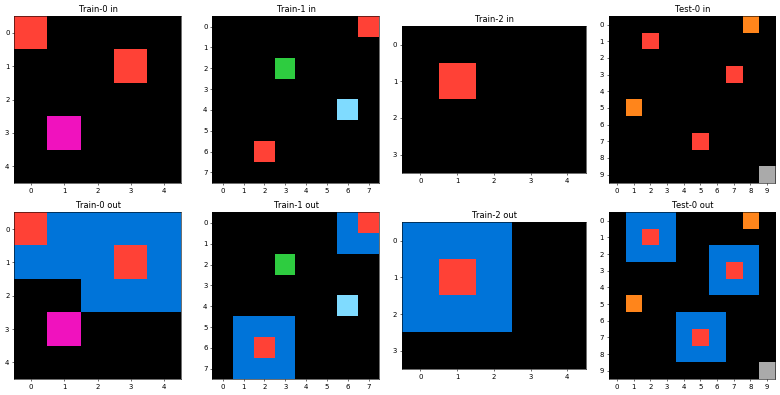

351
14 92


In [19]:
right=0
wrong=0
for i in range(400):
#     print(i)
    task = Trains[i]

    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        a = Solve_mode_dict(basic_task)

        if a != -1: 
            if task['test'][j]['output'] == a:
                plot_picture(a)
                plot_task(task)
                print(i)
                right+=1
            else:
                wrong+=1
print(right,wrong)

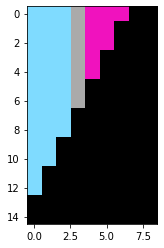

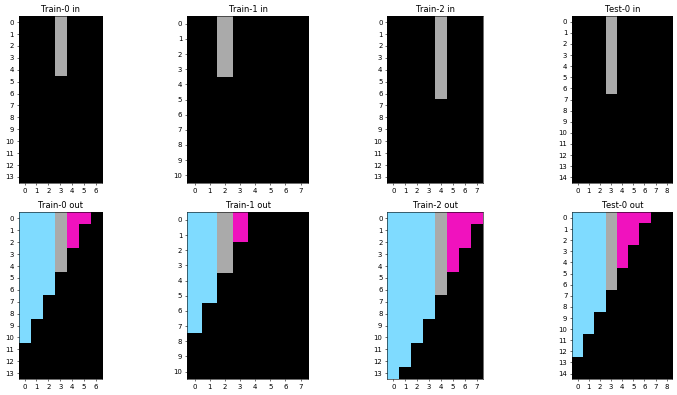

126


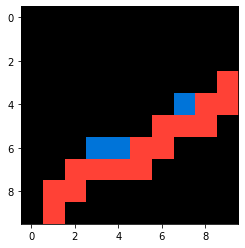

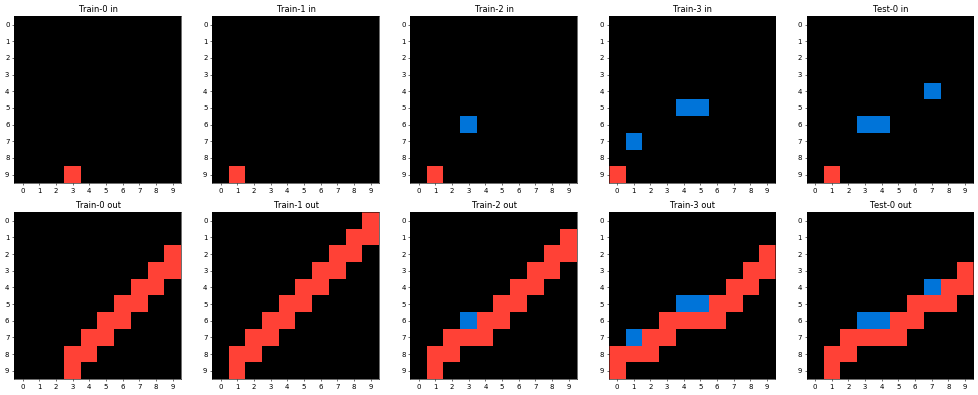

165
2 58


In [20]:
right=0
wrong=0
for i in range(400):
#     print(i)
    task = Evals[i]

    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        a = Solve_mode_dict(basic_task)

        if a != -1: 
            if task['test'][j]['output'] == a:
                plot_picture(a)
                plot_task(task)
                print(i)
                right+=1
            else:
                wrong+=1
print(right,wrong)

In [21]:
def color_classes(a):
    b = len(np.nonzero(np.unique(a))[0])
    return b
#黑色以外的顏色種類數

In [22]:
def one_color_different(basic_task):
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    one_color_di=True
    color=0
    same_color=True
    for x, y in zip(Input,Output):
        if color_classes(x)!=1:
            one_color_di=False
            break
        
        if 0 in np.unique(x):
            x_color=np.unique(x)[1]
        else:
            x_color=np.unique(x)[0]
#         print(x_color)
        if color!=0 and x_color!=color:
            
            same_color=False
            break
        else:
            color=x_color

    if one_color_di==True and same_color==False:
        return True
    else:
        return False

In [23]:
def Solve_mode_dict_one_color_di(basic_task): 
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    total_dict={}
    total_sam=[]
        
    if one_color_different(basic_task)==False:
            return -1
    for x, y in zip(Input,Output):
        if len(x)!=len(y) or len(x[0])!=len(y[0]):
            return -1


        if 0 in np.unique(x):
            x_color=np.unique(x)[1]
        else:
            x_color=np.unique(x)[0]
        
        x_array=np.array(x)
        y_array=np.array(y)
        x_array[x_array==x_color]=1
        y_array[y_array==x_color]=1
        x=x_array.tolist()
        y=y_array.tolist()
        
        if findmodemap(x,y)==-1:
            return -1
        else:
            dict1,sam1x1=findmodemap(x,y)
            total_dict=dict(total_dict,**dict1)
            total_sam.extend(sam1x1)
    for x, y in zip(Input,Output):
        if 0 in np.unique(x):
            x_color=np.unique(x)[1]
        else:
            x_color=np.unique(x)[0]
        
        x_array=np.array(x)
        y_array=np.array(y)
        x_array[x_array==x_color]=1
        y_array[y_array==x_color]=1
        x=x_array.tolist()
        y=y_array.tolist()
#         plot_picture(usemodedict(x,total_dict))
        if y!=usemodedict(x,total_dict,total_sam):
            return -1

    if 0 in np.unique(Test_Case):
        Test_color=np.unique(Test_Case)[1]
    else:
        Test_color=np.unique(Test_Case)[0]
    Test_Case_array=np.array(Test_Case)
    Test_Case_array[Test_Case_array==Test_color]=1
    Test_Case=Test_Case_array.tolist()
    res=usemodedict(Test_Case,total_dict,total_sam)
    res_array=np.array(res)
    res_array[res_array==1]=Test_color
    res=res_array.tolist()   
    return res

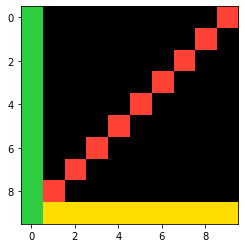

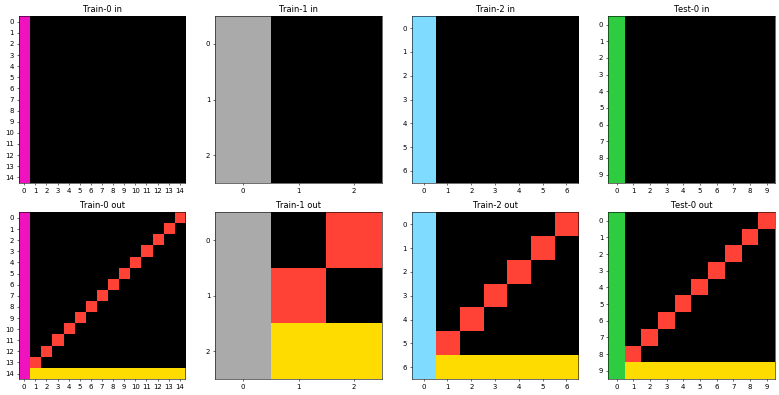

83


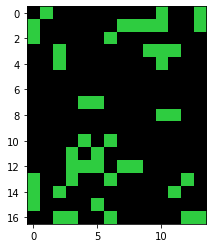

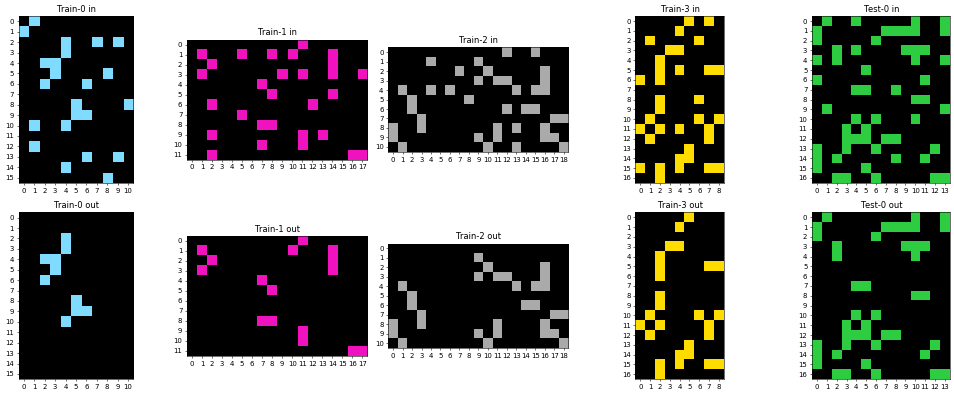

96


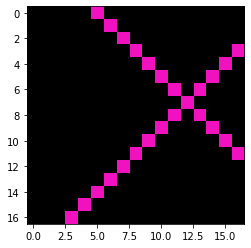

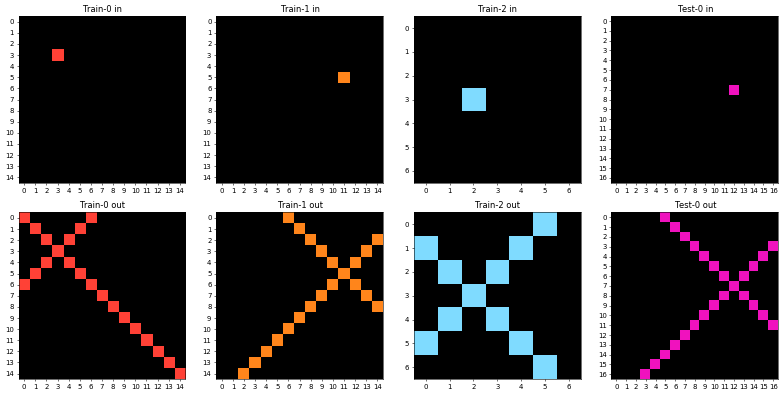

140


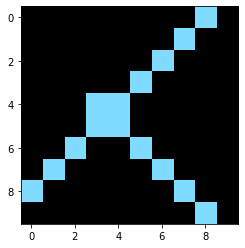

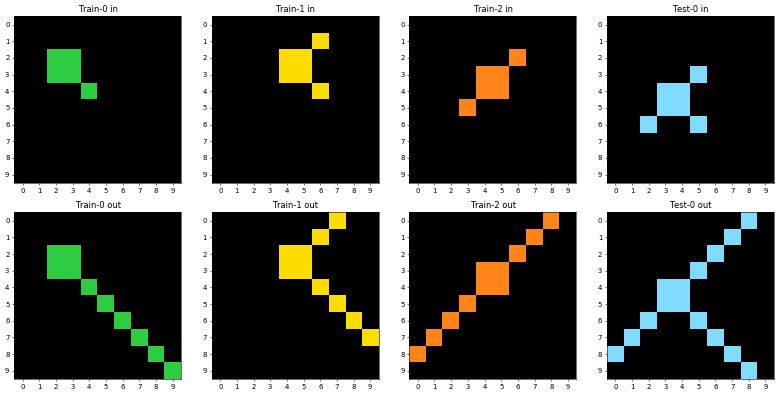

189
4 2


In [24]:
right=0
wrong=0
for i in range(400):
#     print(i)
    task = Trains[i]

    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        a = Solve_mode_dict_one_color_di(basic_task)

        if a != -1: 
            if task['test'][j]['output'] == a:
                plot_picture(a)
                plot_task(task)
                print(i)
                right+=1
            else:
                wrong+=1
#                 plot_picture(a)
#                 plot_task(task)
#                 print(i)
print(right,wrong)

In [25]:
right=0
wrong=0
for i in range(400):
#     print(i)
    task = Evals[i]

    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        a = Solve_mode_dict_one_color_di(basic_task)

        if a != -1: 
            if task['test'][j]['output'] == a:
                plot_picture(a)
                plot_task(task)
                print(i)
                right+=1
            else:
                wrong+=1
#                 plot_picture(a)
#                 plot_task(task)
#                 print(i)
print(right,wrong)
            

0 1


In [ ]:
for i in range(57,58):
    task = Trains[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        a = Solve_mode_dict(basic_task)

        if a != -1 and task['test'][j]['output'] == a:
            plot_picture(a)
            plot_task(task)
            print(i)

In [ ]:
i=1
A=Trains[347]["train"][i]["input"]
B=Trains[347]["train"][i]["output"]
C=Trains[347]["test"][0]["input"]
#findmodemap(A,B)

total_dict,sam1x1=findmodemap(A,B)

res=usemodedict(C,total_dict,sam1x1)
plot_picture(res)


In [396]:
A0=Trains[57]["train"][2]["input"]
B0=Trains[57]["train"][2]["output"]
A=Defensive_Copy(A0)
B=Defensive_Copy(B0)
A[0][0]=B[0][0]
total_dict,sam1x1=findmodemap(A,B)
C=Trains[57]["test"][0]["input"]
C[0][0]=B[0][0]
usemodedict(A,total_dict,sam1x1)
# findmodemap(A,B)

[[3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [297]:
findmodemap(A,B)

({'[[-1 -1 -1]\n [-1  3  0]\n [-1  0  0]]': array([[-1, -1, -1],
         [-1,  3,  3],
         [-1,  0,  0]]),
  '[[-1 -1 -1 -1 -1]\n [-1 -1 -1 -1 -1]\n [-1 -1  3  0  0]\n [-1 -1  0  0  0]\n [-1 -1  0  0  0]]': array([[-1, -1, -1, -1, -1],
         [-1, -1, -1, -1, -1],
         [-1, -1,  3,  3,  3],
         [-1, -1,  0,  0,  0],
         [-1, -1,  3,  3,  3]]),
  '[[-1 -1 -1]\n [-1  3  3]\n [-1  0  0]]': array([[-1, -1, -1],
         [-1,  3,  3],
         [-1,  0,  0]]),
  '[[-1 -1 -1 -1 -1]\n [-1 -1 -1 -1 -1]\n [-1 -1  3  3  0]\n [-1 -1  0  0  0]\n [-1 -1  0  0  0]]': array([[-1, -1, -1, -1, -1],
         [-1, -1, -1, -1, -1],
         [-1, -1,  3,  3,  3],
         [-1, -1,  0,  0,  0],
         [-1, -1,  3,  3,  3]]),
  '[[-1 -1 -1]\n [ 3  3  0]\n [ 0  0  0]]': array([[-1, -1, -1],
         [ 3,  3,  3],
         [ 0,  0,  0]]),
  '[[-1 -1 -1 -1 -1]\n [-1 -1 -1 -1 -1]\n [-1  3  3  0  0]\n [-1  0  0  0  0]\n [-1  0  0  0  0]]': array([[-1, -1, -1, -1, -1],
         [-1, -1, -1, 